# Worked Example: Dimensionality Reduction & Visualization

This notebook will give you a chance to see examples using some of the unsupervised learning methods implemented in scikit-learn, as well as give you a chance to play around with some of the visualization tools provided by matplotlib.  Keep in mind that there are other libraries out there for visualization (and for machine learning in general); this is not the full extent of what is possible, just an introduction.


In [1]:
# CPSC 66 - Machine Learning
# Example by Dr. Ben Mitchell

In [2]:
import numpy as np

# import sklearn stuff
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# set up for plotting figures in the notebook
%matplotlib inline
# NOTE: you can also try 'notebook' or 'widget' in place of 'inline' (may require installing extra packages, but more functionality)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Load some data
This time, we're going to load a couple of data sets to play with.  First, we'll load our old friend the Iris dataset, but then we'll load another dataset that's a bit higher dimensional, and allows other kinds of visualizations.  

In [3]:
# load the iris dataset
iris = datasets.load_iris()

In [4]:
# note that the iris data is 4-dimensional
iris.data.shape

(150, 4)

In [5]:
# let's look at the first 10 elements
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

## Plot the data
Since the iris dataset has 4 features, we'll need to plot them as pairs; we can use color to represent class label.  Here is an example of plotting the first two dimensions:

Text(0.5, 1.0, 'Iris dataset (first two dimensions)')

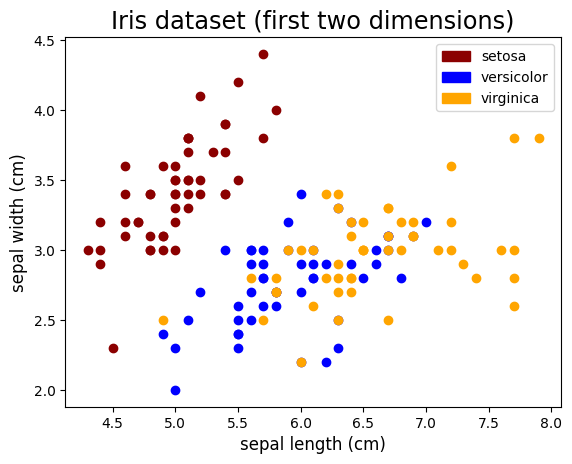

In [6]:
plt.figure() # make a new figure to plot in
# let's set up a list of colors for the different class labels:
colors = ['darkred', 'blue', 'orange']
# now we'll loop over the points in our data set, and plot them one at a time
for i in range(len(iris.data)):
    # use the first 2 dimensions as our x and y coordinates
    x = iris.data[i][0]
    y = iris.data[i][1]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)

# now let's add some axis labels; we'll use the names from the data set
plt.xlabel(iris.feature_names[0], fontsize='large')
plt.ylabel(iris.feature_names[1], fontsize='large')
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
# now actually show the legend
plt.legend(handles=[red, blue, orange], loc='best')

# let's add a title
plt.title('Iris dataset (first two dimensions)', fontsize='xx-large')

# Plot the other combinations of axes
Let's put the above code into a function so we can plot whichever pair of axes we want, then call it on all pairs

In [7]:
def makePlot(xDim, yDim):
    plt.figure(figsize=(6,6), dpi=80) # make a new figure to plot in
    # let's set up a list of colors for the different class labels:
    colors = ['darkred', 'blue', 'orange']
    # now we'll loop over the points in our data set, and plot them one at a time
    for i in range(len(iris.data)):
        # use the first 2 dimensions as our x and y coordinates
        x = iris.data[i][xDim]
        y = iris.data[i][yDim]
        # use the target (which we know is 0, 1, or 2) to select the color for this point
        c = colors[iris.target[i]]
        # plot the point as a single point in a scatter graph
        plt.scatter(x, y, color=c)

    # now let's add some axis labels; we'll use the names from the data set
    plt.xlabel(iris.feature_names[xDim], fontsize='large')
    plt.ylabel(iris.feature_names[yDim], fontsize='large')
    # if we want a key, we'll need to make "handles" attaching colors to names
    red = mpatches.Patch(color='darkred', label='setosa')
    blue = mpatches.Patch(color='blue', label='versicolor')
    orange = mpatches.Patch(color='orange', label='virginica')
    # now actually show the legend
    plt.legend(handles=[red, blue, orange], loc='best')

    # let's add a title
    titleString = 'Iris dataset (dimensions ' + str(xDim) + ' and ' + str(yDim) +')'
    plt.title(titleString, fontsize='xx-large')
    plt.show()

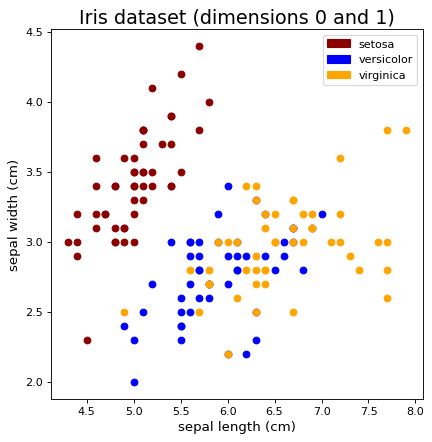

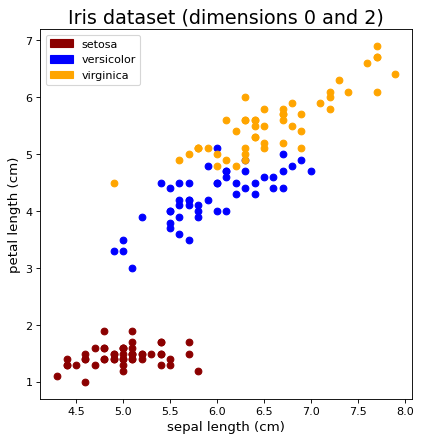

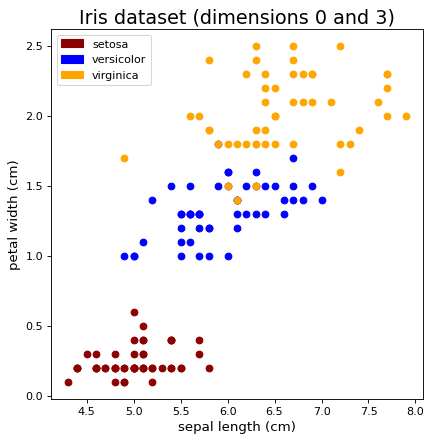

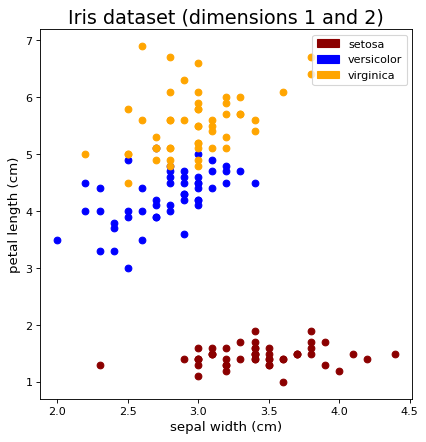

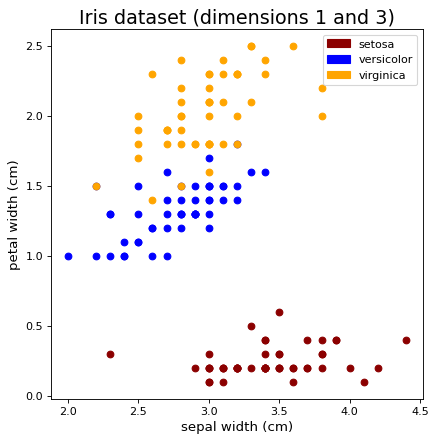

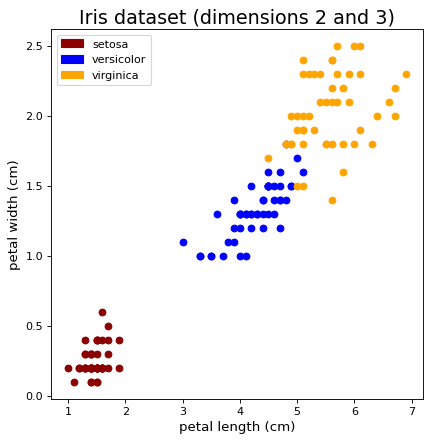

In [8]:
for i in range(0, 4):
    for j in range(i, 4):
        if i != j:
            makePlot(i, j)

# Which one seems the most useful?
Consider which of these plots seems the best, and why?

***



## Run PCA
Here, we'll apply principal component analysis (PCA) to the dataset.  We'll use `n_components=2` to indicate we want to reduce our dimensionality to 2 since we want to plot it on a 2D display.

In [9]:
# set up a PCA learner
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(iris.data)
# transform our data using the learned transform
iris2d = eigenbasis.transform(iris.data)

In [10]:
# note that our transformed dat is now 2-dimensional
iris2d.shape

(150, 2)

In [11]:
# again, let's look at the first 10 elements; note that they are 2 dimensional, rather than 4
iris2d[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

### Examining components
We can look at the actual "principal components," which we're using as the basis for our transformed data space.  Since each component is a vector in the original data space, we can see what "axis" in the original space is the one of primary variance.

Since we said to use the top 2 components, we're going to have two vectors, each of length 4 (since our original data was 4 dimensional).

We can also show the amount of the total variance explained by each component, which tells us how "important" they are.

In [12]:
# the actual components
print("principal components:\n", pca.components_)
# let's also look at how much of the total variance we were able to cover with 2 dimensions
print('percentage of variance explained by first 2 principal components:', pca.explained_variance_ratio_)

principal components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
percentage of variance explained by first 2 principal components: [0.92461872 0.05306648]


## Make a plot of the 2D "transformed" data
 First, here's an example adapted from http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

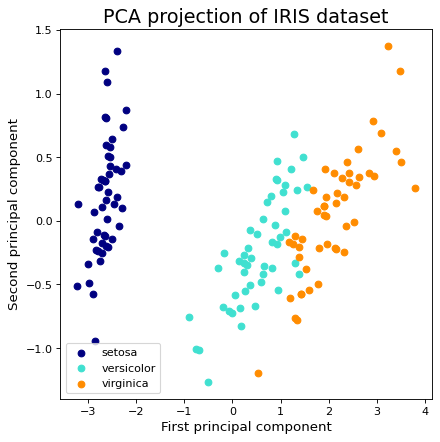

In [13]:
# make a new figure
plt.figure(figsize=(6,6), dpi=80)
# pick some colors to use
colors = ['navy', 'turquoise', 'darkorange']

# plot our points with colors and labels
for color, i, iris.target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(iris2d[iris.target == i, 0], iris2d[iris.target == i, 1], color=color, label=iris.target_name)
plt.legend(loc='best')
plt.xlabel('First principal component', fontsize='large')
plt.ylabel('Second principal component', fontsize='large')
plt.title('PCA projection of IRIS dataset', fontsize='xx-large')
plt.show()

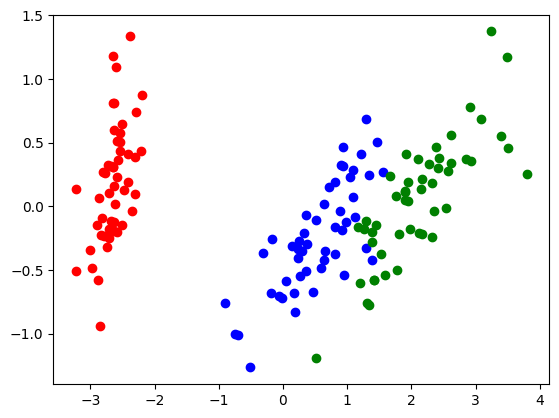

In [14]:
# here's an alternative means of plotting this data that may be easier to follow,
# though it's going to run slower, and makes it more of a pain to print a legend
colors = ['red', 'blue', 'green']
plt.figure()
# loop over examples, and plot each one
for i in range(len(iris2d)):
    point = iris2d[i]
    classLabel = iris.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

# Compare this to the 6 plots from before
Does this plot seem "better" than the plots we made before using the original axes?  Consider the *pros* and *cons* of the two ways of visualizing the data (note that you should have at minimum one of each):

***



## SciKit Learn has several other methods of generating embeddings

We discussed several of these in class; see https://scikit-learn.org/stable/modules/manifold.html for the SciKit Learn users guide on the subject.  Here, we're going to use t-SNE and see how it compares to PCA.

Note that t-SNE is stochastic, so re-running this cell will result in a different plot each time.  Try it out and see!

/scratch/knerr/venvs/cs66/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/scratch/knerr/venvs/cs66/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE plot of IRIS dataset')

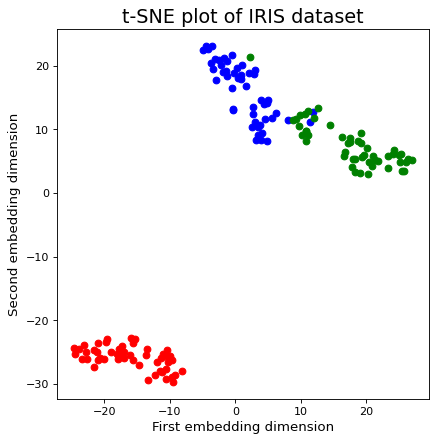

In [15]:
from sklearn import manifold

irisTSNE = manifold.TSNE(n_components = 2, perplexity = 15).fit_transform(iris.data)

colors = ['red', 'blue', 'green']
plt.figure(figsize=(6,6), dpi=80)
# loop over examples, and plot each one
for i in range(len(iris2d)):
    point = irisTSNE[i]
    classLabel = iris.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

plt.xlabel('First embedding dimension', fontsize='large')
plt.ylabel('Second embedding dimension', fontsize='large')
plt.title('t-SNE plot of IRIS dataset', fontsize='xx-large')

# Now let's try a different dataset
Here, we'll work with a set of small "pictures" of handwritten numeric digits.  Note that this is a miniature version; most real-world image datasets are much bigger (both in dimensionality and number of examples), but the same principles will apply.

In [16]:
# load a dataset composed of small images of written numbers
digits = datasets.load_digits()

In [17]:
# let's take a look at the shape of the dataset
digits.data.shape

(1797, 64)

Note that each example has 64 features, which in this case represent values from a 8x8 pixel grayscale image

In [18]:
# let's look at a random example; note that it's just a single vector with 64 elements
print('label is :', digits.target[20])
digits.data[20]

label is : 0


array([ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,
       16.,  2.,  0.,  0.,  4., 16.,  9.,  1., 14.,  2.,  0.,  0.,  4.,
       16.,  0.,  0., 16.,  2.,  0.,  0.,  0., 16.,  1.,  0., 12.,  8.,
        0.,  0.,  0., 15.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  9., 14.,
        9., 14.,  1.,  0.,  0.,  0.,  2., 12., 13.,  4.,  0.,  0.])

In [19]:
# note that we can 'reshape' this data to get an 8x8 2D array (i.e. matrix) with those values
mat = np.reshape(digits.data[20], [8,8])
mat

array([[ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  4., 16.,  9.,  1., 14.,  2.,  0.],
       [ 0.,  4., 16.,  0.,  0., 16.,  2.,  0.],
       [ 0.,  0., 16.,  1.,  0., 12.,  8.,  0.],
       [ 0.,  0., 15.,  9.,  0., 13.,  6.,  0.],
       [ 0.,  0.,  9., 14.,  9., 14.,  1.,  0.],
       [ 0.,  0.,  2., 12., 13.,  4.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

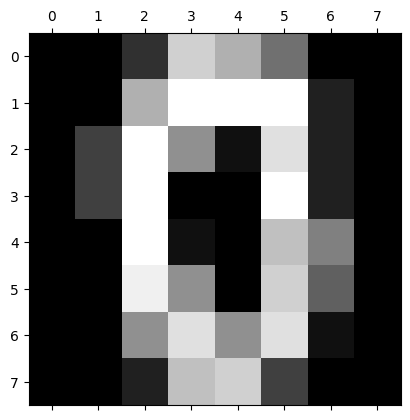

In [20]:
# we can also ask matplotlib to treat these examples as images (which they are), and plot one:
plt.gray() # use gray levels rather than colors
plt.matshow(mat) # show a matrix (i.e. 2D array) as visual values

# Visualize this data
Note that we can't realistically visualize all pairs of axes, there's way too many (though we can look at example images as shown above).  However, we can still do PCA and do a scatterplot of the first two dimensions, which is what you should do next.  Note that there are now going to be 10 different classes (the digits 0 through 9), so you'll need to pick some more colors to give each class its own color.  Try to ensure that the colors are visually distinct; here's a link to some colored patches along with their CSS names (which pyplot will recognise) http://www.crockford.com/wrrrld/color.html

In [21]:
# set up a PCA learner
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(digits.data)
# transform our data using the learned transform
digits2d = eigenbasis.transform(digits.data)

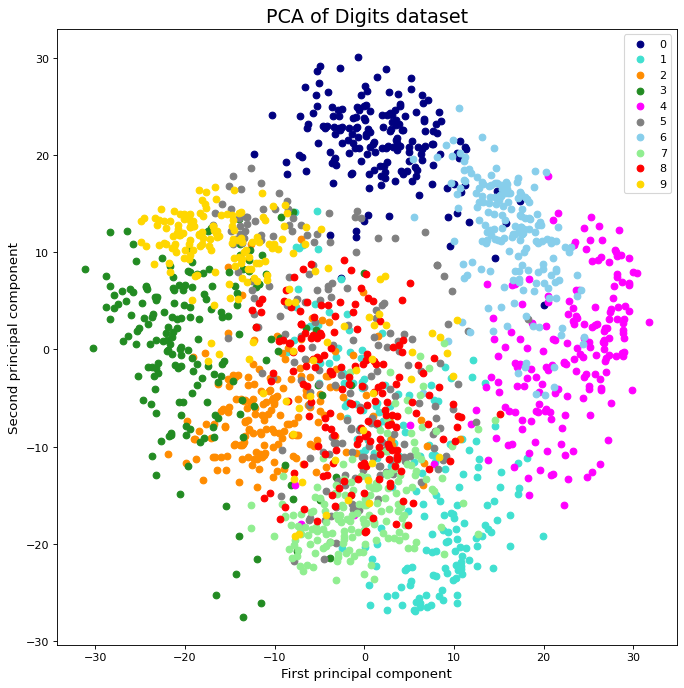

In [22]:
# make a new figure
plt.figure(figsize=(10,10),dpi=80) # we'll make this figure a bit bigger, since it would be very busy looking otherwise
# pick some colors to use
colors = ['navy', 'turquoise', 'darkorange', 'forestgreen', 'fuchsia', 'gray', 'skyblue', 'lightgreen','red','gold']

# plot our points with colors and labels
for color, i, digits.target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], digits.target_names):
    plt.scatter(digits2d[digits.target == i, 0], digits2d[digits.target == i, 1], color=color, label=digits.target_name)
plt.legend(loc='best')
plt.xlabel('First principal component', fontsize='large')
plt.ylabel('Second principal component', fontsize='large')
plt.title('PCA of Digits dataset', fontsize='xx-large')
plt.show()

/scratch/knerr/venvs/cs66/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/scratch/knerr/venvs/cs66/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


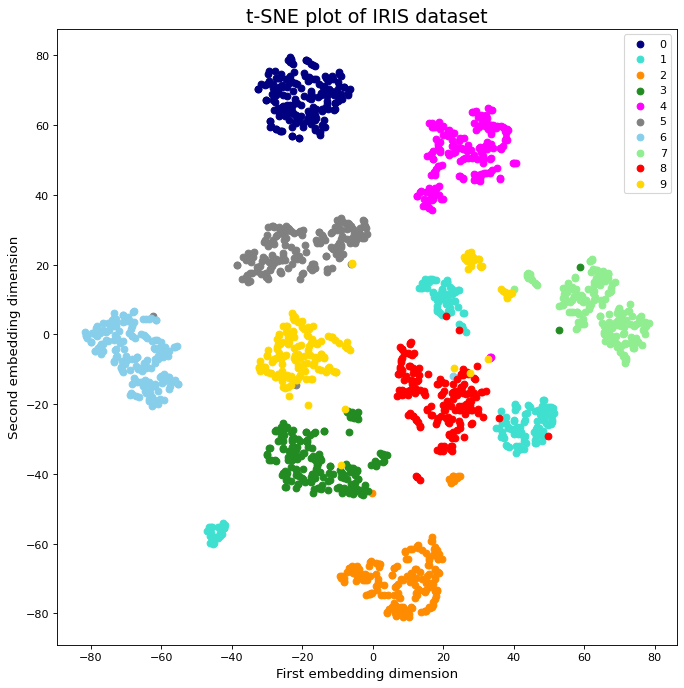

In [23]:
# run TSNE on the data to get a (different) 2-dimensional version, and make a plot for this version
# NOTE: this make take some time...
digitsTSNE = manifold.TSNE(n_components = 2, perplexity = 15).fit_transform(digits.data)

# make a new figure
plt.figure(figsize=(10,10),dpi=80) # we'll make this figure a bit bigger, since it would be very busy looking otherwise
# pick some colors to use
colors = ['navy', 'turquoise', 'darkorange', 'forestgreen', 'fuchsia', 'gray', 'skyblue', 'lightgreen','red','gold']

for color, i, digits.target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], digits.target_names):
    plt.scatter(digitsTSNE[digits.target == i, 0], digitsTSNE[digits.target == i, 1], color=color, label=digits.target_name)
    
plt.legend(loc='best')
plt.xlabel('First embedding dimension', fontsize='large')
plt.ylabel('Second embedding dimension', fontsize='large')
plt.title('t-SNE plot of IRIS dataset', fontsize='xx-large')
plt.show()

## What do you see?
Examine the plots you've made, and desribe what information about the nature of the data you can glean from the plots.  Note that you may want to play around with the parameters of t-sne and/or re-run it a few times to get a plot you like (in particular, see what different values of the 'perplexity' parameter do).

*** 


## Visualizing components
Another thing we can do with PCA is to look at the principle components themselves.  Since each component is a vector in the original data space, we can view them the same way we did the original vectors; in this case, as images.

Let's try pulling out each of the top two components separately, and visualizing each of them as an image.  

<Figure size 640x480 with 0 Axes>

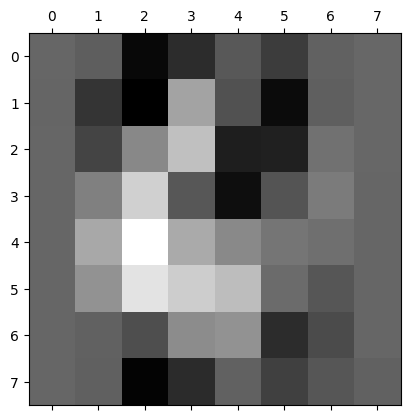

In [24]:
# reshape the first component and plot it as an image
plt.figure()
plt.gray() # use gray levels rather than colors
plt.matshow(np.reshape(pca.components_[0], [8,8])) # show a matrix (i.e. 2D array) as visual values
plt.show()

<Figure size 640x480 with 0 Axes>

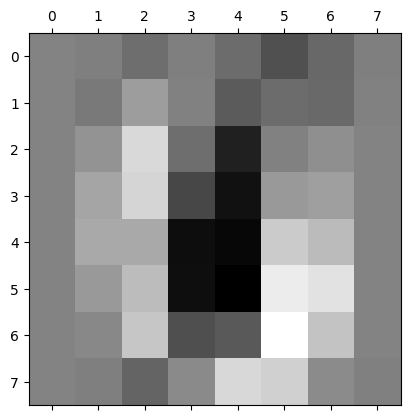

In [25]:
plt.figure()
plt.gray() # use gray levels rather than colors
plt.matshow(np.reshape(pca.components_[1], [8,8])) # show a matrix (i.e. 2D array) as visual values
plt.show()

# Gaussian Mixture Models

This is an example of applying a GMM to the Iris dataset (it's borrowed from the sklearn documentation for their GMM)

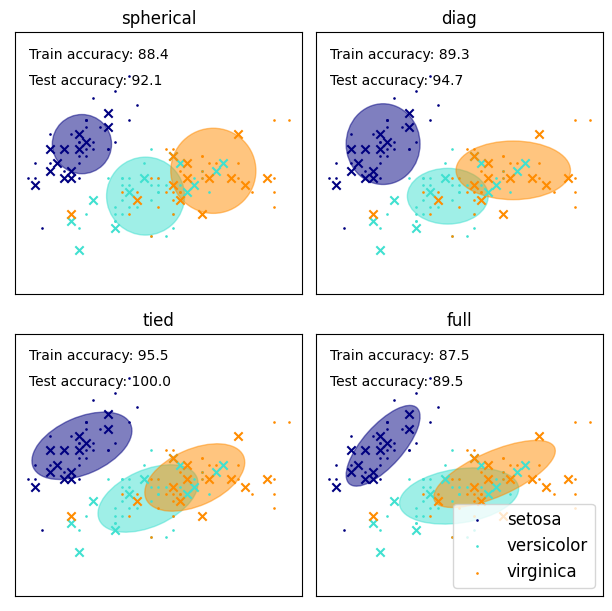

In [26]:
# Adapted from: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()